## 1. Generate views for models

In [1]:
from xgboost import plot_tree
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [3]:
ROOT_PATH=%cd ..
ROOT_PATH='/home/vanessa/PycharmProjects/osh40'

/home/vanessa/PycharmProjects/osh40


### 1.1 Plot Random Forest Models

In [25]:
# Don't put in functions because don't print Image in function...
sensors = ['dust', 'hum_tmp', 'light', 'noise', 'uv']
idx_sensors = ['3', '5', '3', '3', '3']

In [27]:
# Change IDX between 0 to 4 to load model and generate plot tree for de model selected
IDX=4

uv
RandomForestClassifier()


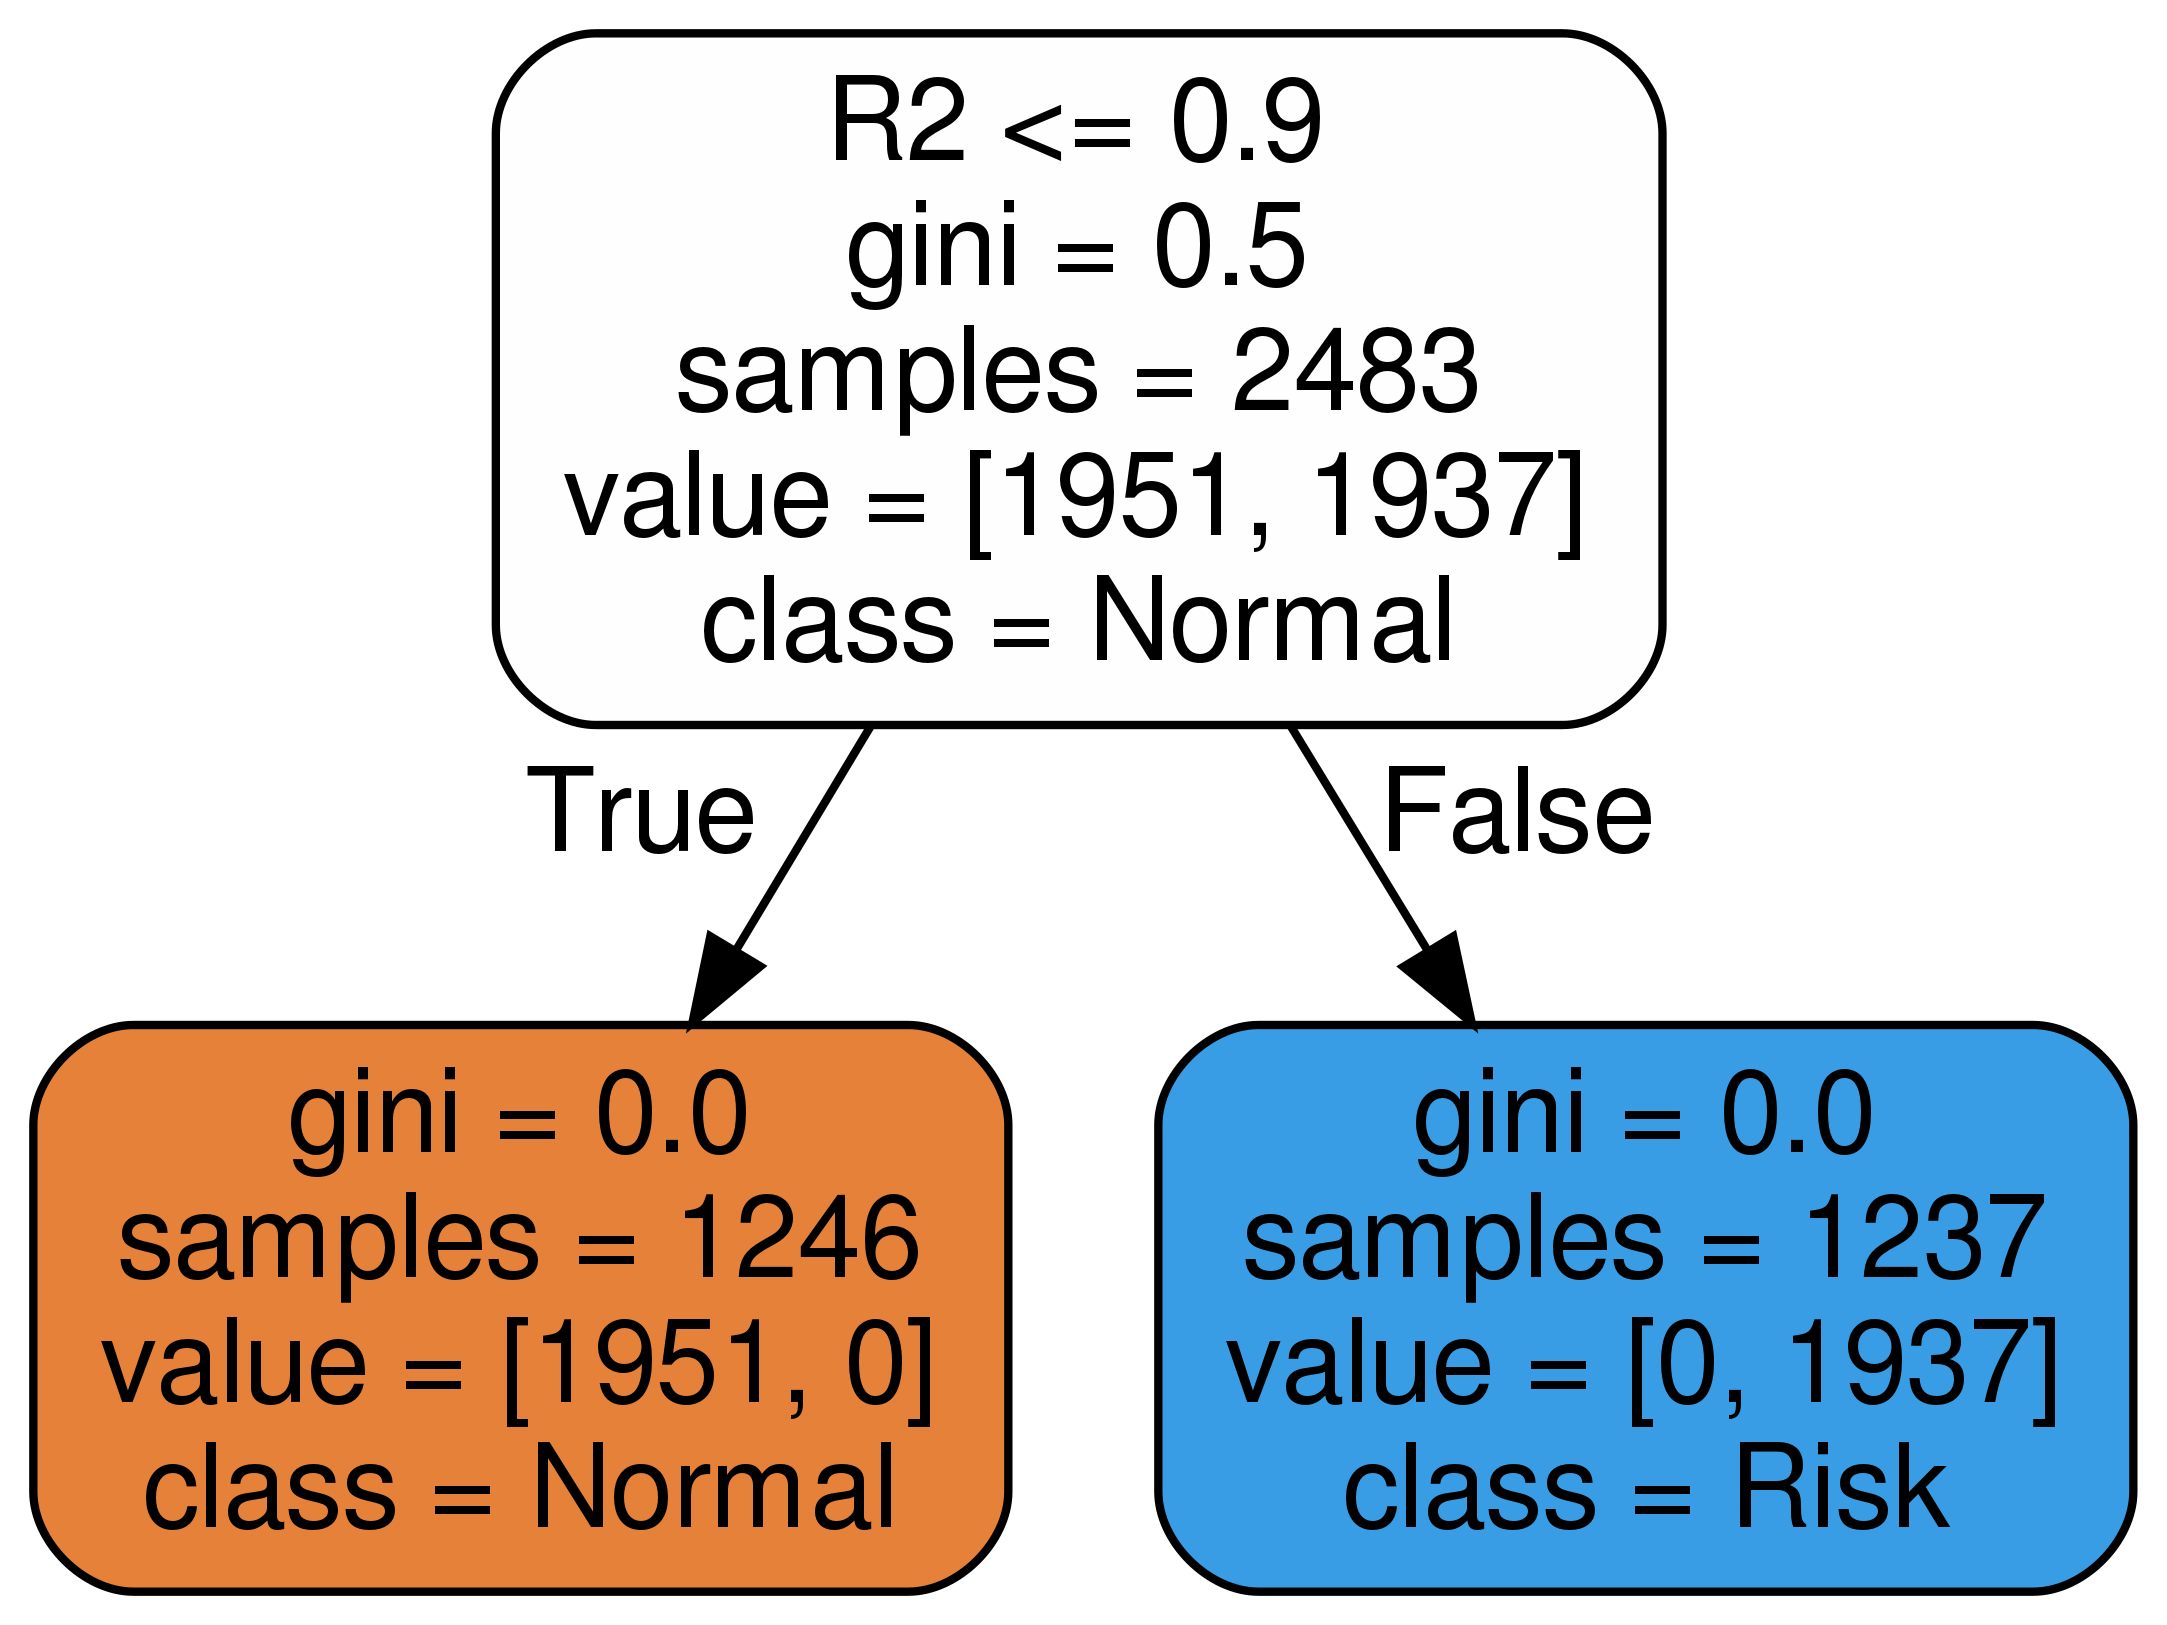

In [28]:
model = pickle.load(open("{}/api/models/{}/RandomForestClassifier_model_{}.pkl".format(ROOT_PATH,
                                                                                       sensors[IDX],
                                                                                       idx_sensors[IDX]),"rb"))
print(sensors[IDX])
print(model)

if sensors[IDX] == 'hum_tmp':
    f_names = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12']
else:
    f_names = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6']

# Export as dot file. Reference: https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
export_graphviz(model.estimators_[5], out_file='{}_tree.dot'.format(sensors[IDX]), 
                feature_names = f_names,
                class_names = ['Normal', 'Risk'],
                rounded = True, proportion = False, precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', '{}_tree.dot'.format(sensors[IDX]), '-o', '{}_tree.png'.format(sensors[IDX]), '-Gdpi=600'])
Image(filename = '{}_tree.png'.format(sensors[IDX]))
